<a href="https://colab.research.google.com/github/cloud-vinny/Computing_Tech_Proj_Assignment/blob/main/Spam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [97]:
df = pd.read_csv("dataset/cleaned_dataset.csv")
print(df.shape)
print("Columns:", df.columns.tolist())
print("First few rows:")
df.head()

(10598, 6)
Columns: ['text', 'spam', 'num_chars', 'num_words', 'num_sen10', 'preprocessed_text']
First few rows:


,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,2/2 146tf150p,1,13,2,1,146tf150p
1,"risk management book order vince , fyi , i o...",0,190,38,3,risk manag book order vinc fyi order risk mana...
2,so what about you. what do you remember,0,39,9,2,rememb
3,"how are you, my love ? are you with your broth...",0,147,35,4,love brother time talk english grin say hey mu...
4,great comedy..cant stop laughing da:),0,37,9,1,great comedi cant stop laugh da


**Data Cleaning**

In [98]:
#lowercase all the chars
df.text = df.text.str.lower()

In [99]:
# Clear and repeated word : "subject: " , "re :" , "fw :" , and "news :" .
df['text'] = df['text'].str.replace("subject: ", "", regex=True)
df['text'] = df['text'].str.replace("re : ", "", regex=True)
df['text'] = df['text'].str.replace("fw : ", "", regex=True)
df['text'] = df['text'].str.replace("news : ", "", regex=True)

df.sample(10)

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
7478,time keeping what about me ! i may need this...,0,1202,313,15,time keep may need futur forward kevin g moor ...
5345,christie and vince : on behalf of enron team ...,0,518,99,5,christi vinc behalf enron team 1 would like th...
50,"viagrra scores ! hello , welcome to pharmonli...",1,473,81,3,viagrra score hello welcom pharmonlin puritan ...
4995,new frbny research : 5 / 3 please respond to ...,0,1832,394,35,new frbni research 5 3 pleas respond michael d...
8395,dunno dat's wat he told me. ok lor...,0,37,11,2,dunno dat wat told ok lor
80,"summer internship shirley , fyi . it looks l...",0,1770,455,19,summer internship shirley fyi look like cantek...
2355,"allan roberts email jim , thanks . i shall d...",0,1626,372,31,allan robert email jim thank shall drop e mail...
361,fortune 500 work at home reps needed ! immedi...,1,1045,210,17,fortun 500 work home rep need immedi help need...
35,she's fine. good to hear from you. how are you...,0,74,21,4,fine good hear dear happi new year oh
7530,"mscf speaker series pierre - philippe , i ha...",0,601,152,15,mscf speaker seri pierr philipp contact alliso...


In [100]:
#checking if there's any missing value of both column
df.isnull().sum()

text                 0
spam                 0
num_chars            0
num_words            0
num_sen10            0
preprocessed_text    1
dtype: int64

In [101]:
#checking if there's any duplicate in text column
df["text"].duplicated().sum()

np.int64(0)

In [102]:
# Remove the duplicate and keep the first one
df = df.drop_duplicates(keep="first")

In [103]:
# Checking the duplicated if it's removed
df.duplicated().sum()

np.int64(0)

**Exploratory Data Analysis**

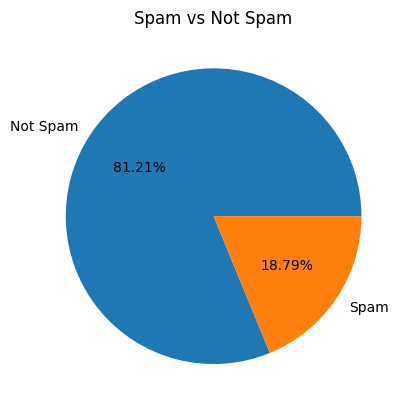

In [104]:
counts = df['spam'].value_counts()
label_map = {1: 'Spam', 0: 'Not Spam'}
labels = [label_map[i] for i in counts.index]

plt.pie(counts,labels=labels,autopct='%0.2f%%')
plt.title('Spam vs Not Spam')
plt.show()
# result shows of imbalance df between not spam and spam

In [105]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [106]:
# Tokenization
df['num_chars']=df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sen10'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,2/2 146tf150p,1,13,2,1,146tf150p
1,"risk management book order vince , fyi , i o...",0,190,38,3,risk manag book order vinc fyi order risk mana...
2,so what about you. what do you remember,0,39,9,2,rememb
3,"how are you, my love ? are you with your broth...",0,147,35,4,love brother time talk english grin say hey mu...
4,great comedy..cant stop laughing da:),0,37,9,1,great comedi cant stop laugh da


In [107]:
df[['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,10598.000000,10598.000000,10598.000000
mean,838.425269,177.056614,11.037271
std,1660.863433,341.413586,27.762059
min,3.000000,1.000000,1.000000
25%,63.000000,15.000000,1.000000
50%,196.000000,43.000000,4.000000
75%,1001.000000,215.750000,12.000000
max,43928.000000,8471.000000,1565.000000


In [108]:
# Not Spam
df[df['spam'] == 0 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,8607.000000,8607.000000,8607.000000
mean,814.859881,173.856512,10.484141
std,1583.168935,329.053969,28.455811
min,3.000000,1.000000,1.000000
25%,51.000000,13.000000,1.000000
50%,154.000000,36.000000,3.000000
75%,1042.000000,223.000000,12.000000
max,43928.000000,8471.000000,1565.000000


In [109]:
# Spam
df[df['spam'] == 1 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,1991.000000,1991.000000,1991.000000
mean,940.297338,190.890507,13.428428
std,1958.841880,390.157658,24.401021
min,9.000000,2.000000,1.000000
25%,157.000000,32.000000,3.000000
50%,423.000000,81.000000,7.000000
75%,917.000000,202.000000,13.500000
max,28418.000000,6128.000000,438.000000


<Axes: xlabel='num_chars', ylabel='Count'>

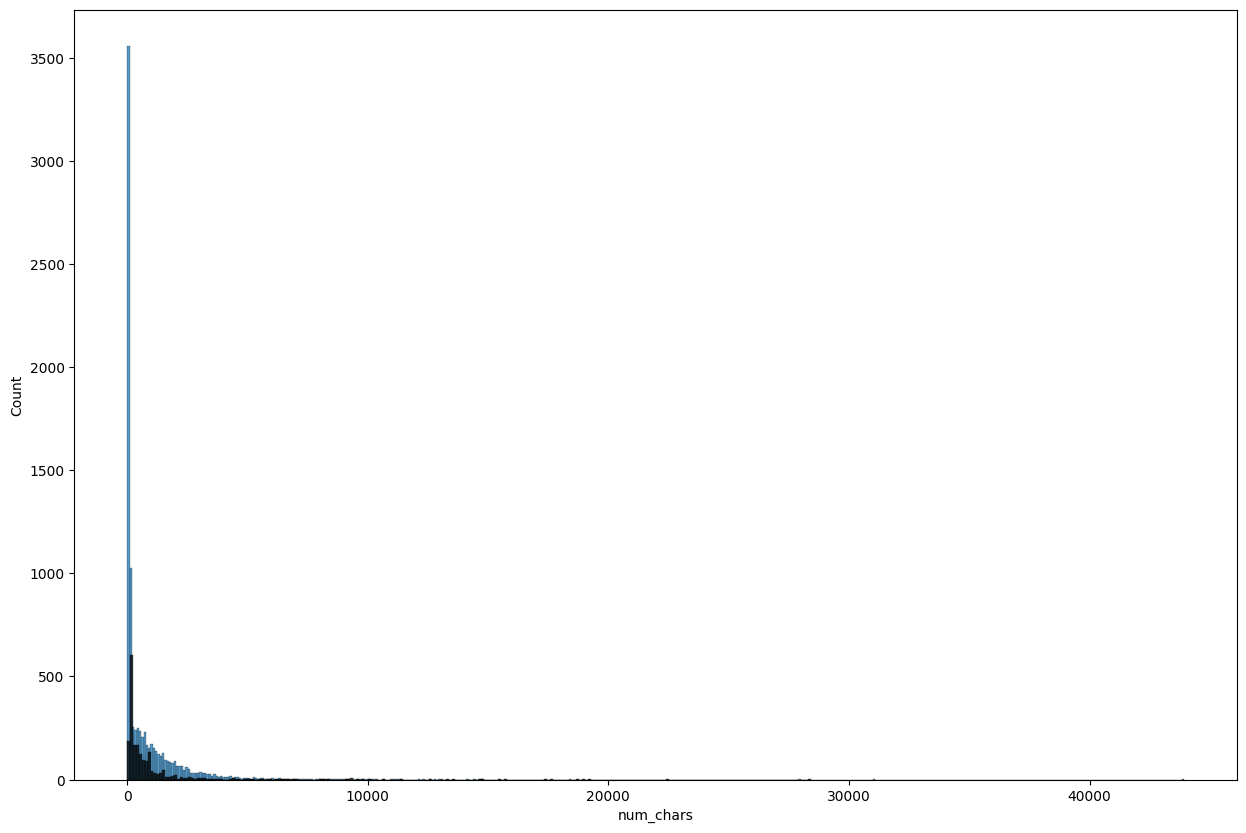

In [110]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="black")

<Axes: xlabel='num_chars', ylabel='Count'>

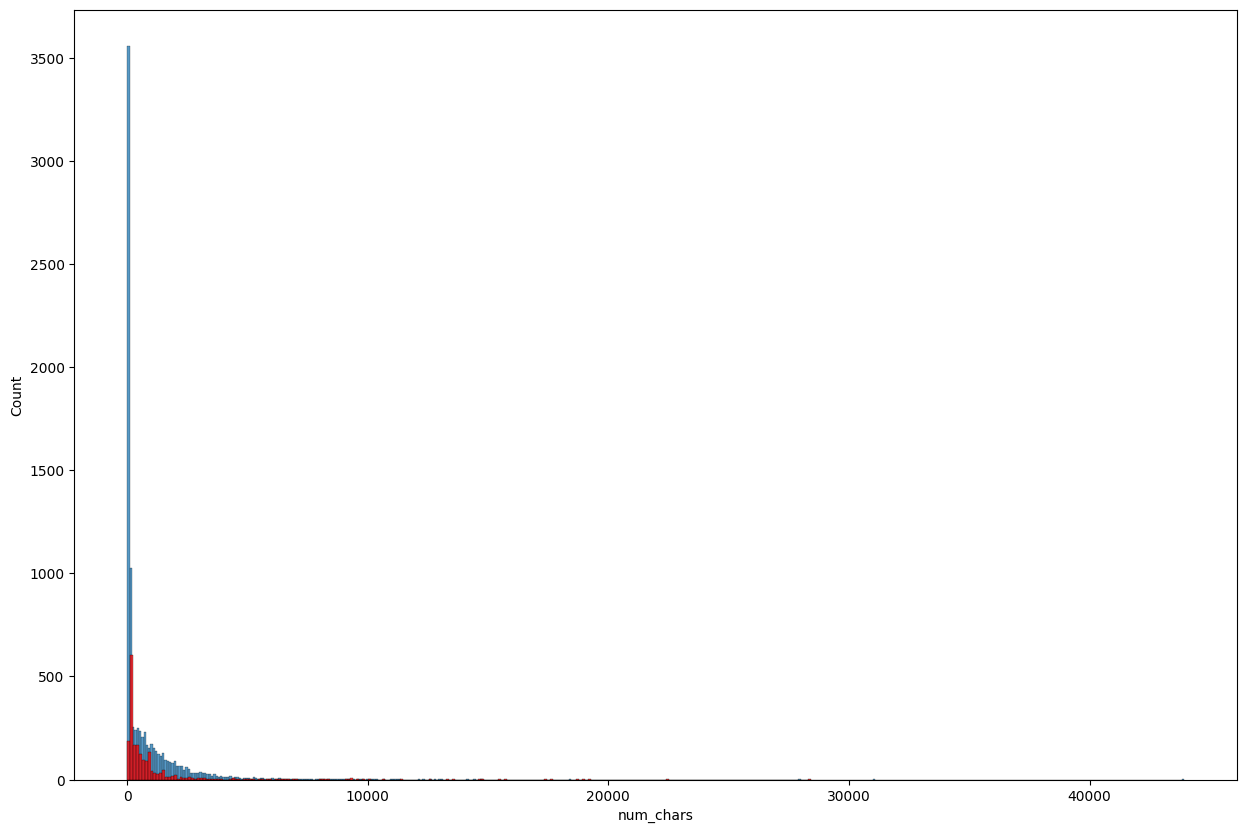

In [111]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")

<Axes: xlabel='num_sen10', ylabel='Count'>

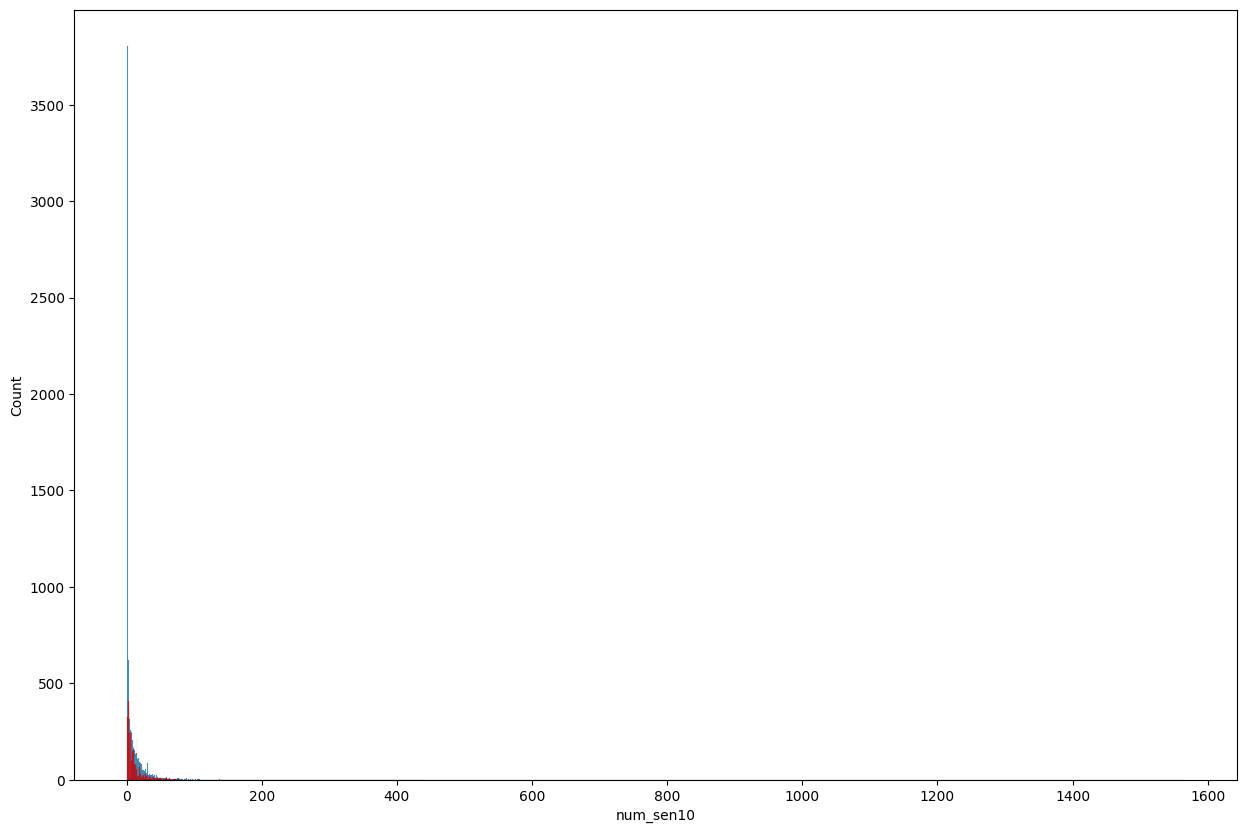

In [112]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_sen10'])
sns.histplot(df[df['spam'] == 1]['num_sen10'], color="red")

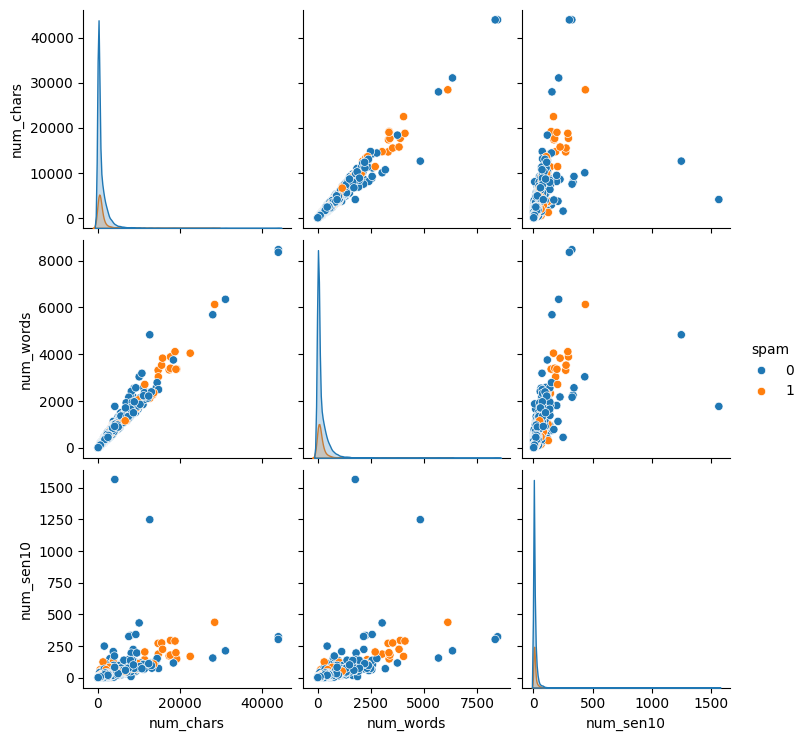

In [113]:
sns.pairplot(df,hue='spam')

In [114]:
# Correlation
corr = df.select_dtypes(include=['number']).corr()
print(corr)

               spam  num_chars  num_words  num_sen10
spam       1.000000   0.029502   0.019489   0.041427
num_chars  0.029502   1.000000   0.988838   0.646461
num_words  0.019489   0.988838   1.000000   0.702245
num_sen10  0.041427   0.646461   0.702245   1.000000


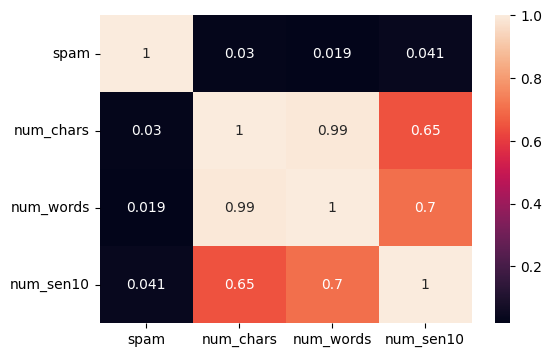

In [115]:
# Heat Map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
plt.show()

**Data Preprocessing**


In [116]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [117]:
from nltk.stem.porter import PorterStemmer
#Stemming method
ps = PorterStemmer()
ps.stem('cooking')

'cook'

In [118]:
def text_transform(text):
  text = text.lower() #lowercase
  text = nltk.word_tokenize(text) #tokenize

  # remove special chars & stopwords & punctuation & stemming
  b = []
  for a in text:
    if a.isalnum() and a not in stopwords.words('english') and a not in string.punctuation:
      b.append(ps.stem(a))

  return " ".join(b)

In [119]:
text = df['text'][500]
# text = "I loved to play basketball and watching anime. How about you? bro"
text_transform(text)

'privat 2003 account statement show 800 point call 08715203652 identifi code 42810 expir'

In [120]:
df["preprocessed_text"] = df['text'].apply(text_transform)
df.head(10)

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,2/2 146tf150p,1,13,2,1,146tf150p
1,"risk management book order vince , fyi , i o...",0,190,38,3,risk manag book order vinc fyi order risk mana...
2,so what about you. what do you remember,0,39,9,2,rememb
3,"how are you, my love ? are you with your broth...",0,147,35,4,love brother time talk english grin say hey mu...
4,great comedy..cant stop laughing da:),0,37,9,1,great comedi cant stop laugh da
5,peniss growth patches are here ! . . . quintes...,1,926,190,25,peniss growth patch quintessenti good morn sir...
6,april lst party ! this is primarily for enron...,0,275,54,6,april lst parti primarili enron research psued...
7,is your hamster dead? hey so tmr i meet you at...,0,64,16,2,hamster dead hey tmr meet 1pm orchard mrt
8,i don't know u and u don't know me. send chat ...,1,158,36,5,know u u know send chat 86688 let find rcvd ld...
9,"up to $ 1 , 500 . 00 part time 22311 check ou...",1,905,210,15,1 500 00 part time 22311 check 1 000 00 intern...


In [121]:
#save the current dataset
df.to_csv("dataset/preprocessed_dataset.csv")

In [122]:
from wordcloud import WordCloud

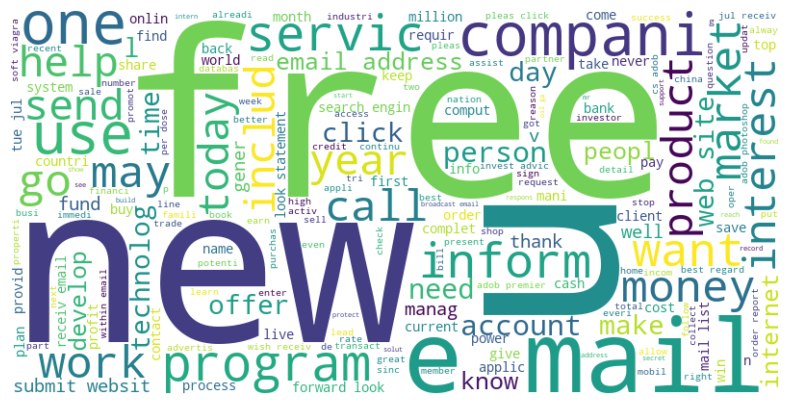

In [123]:
# Generate word cloud only for spam messages
wc = WordCloud(width=800, height=400, background_color='white')
spam_wc = wc.generate(df[df['spam'] == 1]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

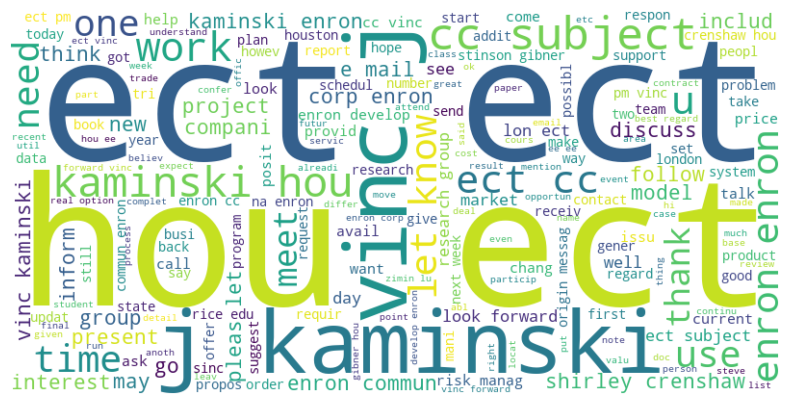

In [124]:
# Generate word cloud only for non spam messages
non_spam_wc = wc.generate(df[df['spam'] == 0]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [125]:
spam_corpus = []
for msg in df[df['spam'] == 1]['preprocessed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

182513

In [126]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,compani,1067
1,com,999
2,1,978
3,mail,917
4,busi,896
5,email,866
6,inform,827
7,free,786
8,get,766
9,2,761


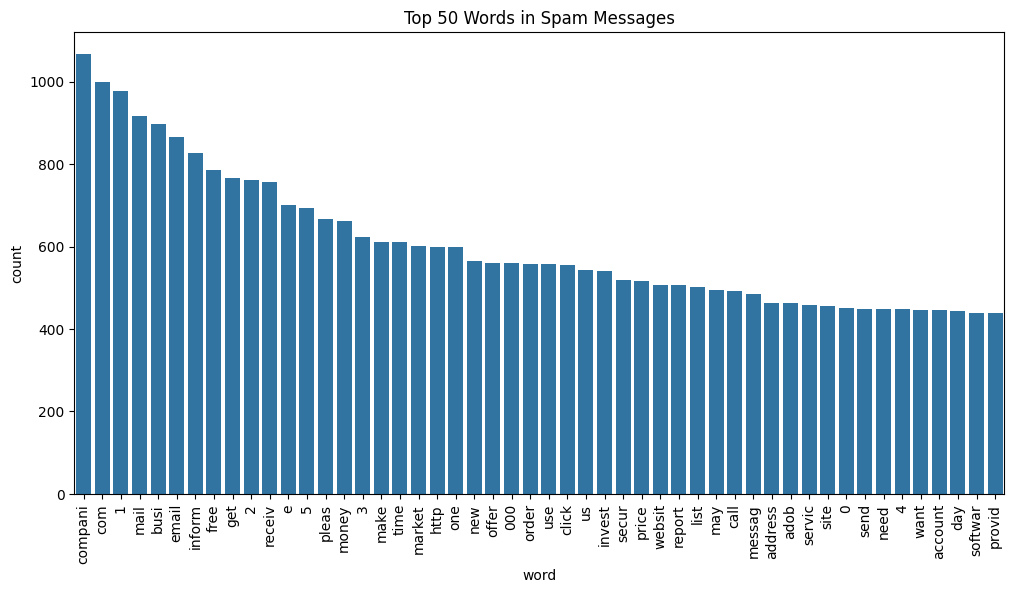

In [127]:
spam_word_counts = Counter(spam_corpus).most_common(50)
df_swc = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_swc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Spam Messages")
plt.show()

In [128]:
non_spam_corpus = []
for msg in df[df['spam'] == 0]['preprocessed_text'].tolist():
  for word in msg.split():
    non_spam_corpus.append(word)
len(non_spam_corpus)

702447

In [129]:
Counter(non_spam_corpus).most_common(50)

[('enron', 12611),
 ('ect', 10972),
 ('vinc', 8027),
 ('hou', 5331),
 ('2000', 4909),
 ('kaminski', 4480),
 ('pleas', 4300),
 ('com', 4240),
 ('subject', 4003),
 ('would', 3986),
 ('cc', 3644),
 ('j', 3509),
 ('thank', 3436),
 ('pm', 3060),
 ('forward', 2789),
 ('2001', 2666),
 ('time', 2662),
 ('research', 2596),
 ('2', 2518),
 ('meet', 2509),
 ('know', 2464),
 ('1', 2448),
 ('group', 2304),
 ('work', 2265),
 ('manag', 2208),
 ('10', 2124),
 ('like', 2088),
 ('market', 2057),
 ('price', 2053),
 ('energi', 2049),
 ('model', 2015),
 ('risk', 1989),
 ('get', 1985),
 ('need', 1963),
 ('power', 1887),
 ('may', 1855),
 ('let', 1848),
 ('3', 1815),
 ('inform', 1786),
 ('regard', 1779),
 ('new', 1763),
 ('use', 1741),
 ('call', 1667),
 ('00', 1646),
 ('develop', 1623),
 ('one', 1605),
 ('11', 1597),
 ('corp', 1583),
 ('look', 1579),
 ('01', 1577)]

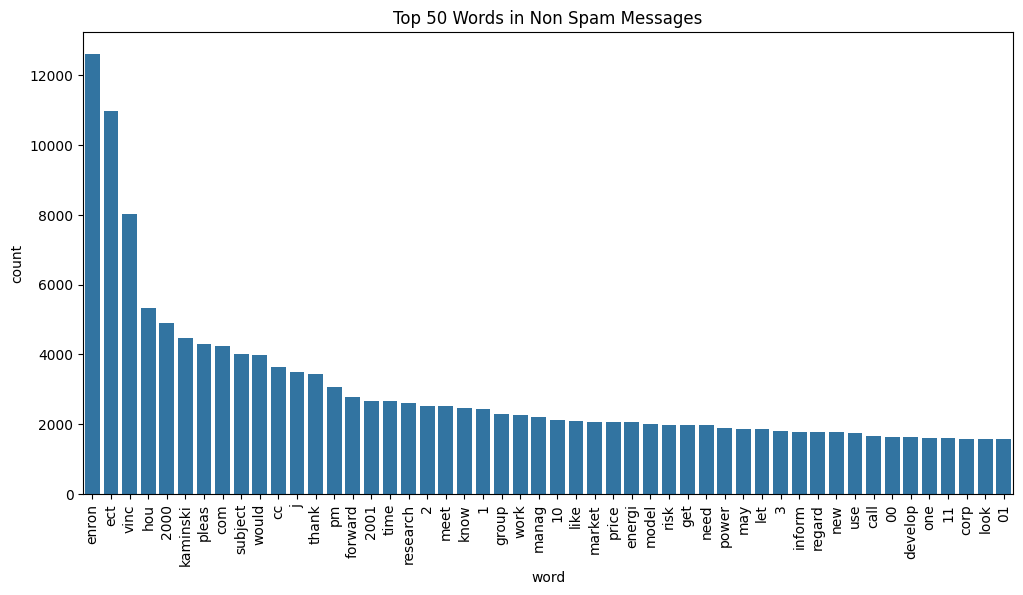

In [130]:
n_spam_word_counts = Counter(non_spam_corpus).most_common(50)
df_nswc = pd.DataFrame(n_spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_nswc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Non Spam Messages")
plt.show()

**Model Building**

In [131]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [132]:
cv = CountVectorizer()
X = cv.fit_transform(df['preprocessed_text']).toarray()

# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df['preprocessed_text']).toarray()

In [133]:
X.shape

(10598, 32446)

In [134]:
y = df['spam'].values
y

array([1, 0, 0, ..., 0, 0, 0], shape=(10598,))

***Spliting Train = 80% and Test = 20%***

In [135]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2)

***Train***

In [136]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [137]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy_score: ")
print(accuracy_score(y_test,y_pred1))
print("Confusion_matrix: ")
print(confusion_matrix(y_test,y_pred1))
print("Precision_score: ")
print(precision_score(y_test,y_pred1))

Accuracy_score: 
0.7679245283018868
Confusion_matrix: 
[[1275  450]
 [  42  353]]
Precision_score: 
0.4396014943960149


In [138]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score: ")
print(accuracy_score(y_test,y_pred2))
print("confusion_matrix: ")
print(confusion_matrix(y_test,y_pred2))
print("precision_score: ")
print(precision_score(y_test,y_pred2))

accuracy_score: 
0.9047169811320754
confusion_matrix: 
[[1532  193]
 [   9  386]]
precision_score: 
0.6666666666666666


In [139]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score: ")
print(accuracy_score(y_test,y_pred3))
print("confusion_matrix: ")
print(confusion_matrix(y_test,y_pred3))
print("precision_score: ")
print(precision_score(y_test,y_pred3))

accuracy_score: 
0.9165094339622641
confusion_matrix: 
[[1704   21]
 [ 156  239]]
precision_score: 
0.9192307692307692


***TESTING PREDICTION***

In [140]:
num = 1020
mess = df['text'][num]
print(f'Message: "{mess}"')

# Apply your preprocessing
mess = text_transform(mess)

# Convert to vector (same as training!)
mess_vec = cv.transform([mess])

#actual
actual = df['spam'][num]
if actual == 1:
  print("Actual: SPAM " )
else:
  print("Prediction: NON SPAM ")


# Predict
y_pred3 = bnb.predict(mess_vec)

if y_pred3 == 1:
  print("Prediction: SPAM " )
else:
  print("Prediction: NON SPAM ")


Message: "contact  jana ,  a correction . i am going to spend one week in australia and i have  just realized that i have to leave on friday , july the 14 th , at night ,  to arrive in sydney on sunday morning .  maybe we can meet on friday the 7 th ( we would like to invite you  to dinner and then we can have a glass of wine outside , the weather  and mosquitoes permitting ) .  alternatively , we can meet during the weekend of july the 29 th .  vince  jlpnymex @ aol . com on 06 / 26 / 2000 01 : 27 : 41 pm  to : vince . j . kaminski @ enron . com  cc :  subject : contact  vince ,  the weekend of july 15 , 2000 is fine for us . which day is better for  you - - friday or saturday ?  do you want to go to the woodlands for a show , or just visit ? also , let me  know if i can bring something .  thanks and we look forward to meeting your family .  jana"
Prediction: NON SPAM 
Prediction: NON SPAM 


In [141]:
# Test the model with a new spam message
test_message = "Congratulations! You have won $1,000,000 in our international lottery! To claim your prize, send us your bank details and personal information immediately. Limited time offer! Click here now!"

print(f"Test Message: {test_message}")
print("\n" + "="*50)

# Apply the same preprocessing as training
processed_message = text_transform(test_message)
print(f"Processed Message: {processed_message}")

# Convert to vector (same as training)
message_vector = cv.transform([processed_message])

# Predict using the best model (Bernoulli Naive Bayes)
prediction = bnb.predict(message_vector)

print("\n" + "="*50)
if prediction == 1:
    print("🎯 PREDICTION: SPAM")
    print("✅ Model correctly identified this as spam!")
else:
    print("❌ PREDICTION: NOT SPAM")
    print("⚠️ Model incorrectly classified this as not spam")

# Show prediction probability
prediction_proba = bnb.predict_proba(message_vector)
print(f"\nConfidence: {max(prediction_proba[0]):.2%}")


Test Message: Congratulations! You have won $1,000,000 in our international lottery! To claim your prize, send us your bank details and personal information immediately. Limited time offer! Click here now!

Processed Message: congratul intern lotteri claim prize send us bank detail person inform immedi limit time offer click

❌ PREDICTION: NOT SPAM
⚠️ Model incorrectly classified this as not spam

Confidence: 100.00%
